# Credict Card Approval Prediction | Logistic regression

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

## The Dataset
We'll use the [Credit Card Approval dataset](http://archive.ics.uci.edu/ml/datasets/credit+approval) from the UCI Machine Learning Repository.
    
We explore the variables within this dataset in the sections below. 

### Reading in the data

First, loading and viewing the dataset. We find that since this data are confidential, the contributor of the dataset has anonymized the feature names.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/89fee4463f428f55d31a254924e18501a3c468c3/Data/classification_sprint/cc_approvals.data',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


The output may appear a bit confusing at its first sight, but let's try to figure out the most important features of a credit card application. The features of this dataset have been anonymized to protect the privacy, but [this blog](http://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html) gives us a pretty good overview of the probable features. The probable features in a typical credit card application are <code>Gender</code>, <code>Age</code>, <code>Debt</code>, <code>Married</code>, <code>BankCustomer</code>, <code>EducationLevel</code>, <code>Ethnicity</code>, <code>YearsEmployed</code>, <code>PriorDefault</code>, <code>Employed</code>, <code>CreditScore</code>, <code>DriversLicense</code>, <code>Citizen</code>, <code>ZipCode</code>, <code>Income</code> and finally the <code>ApprovalStatus</code>. 

This gives us a pretty good starting point, and we can map these features with respect to the columns in the output.   

As we can see from our first glance at the data, the dataset has a mixture of numerical and non-numerical features. This can be fixed with some preprocessing.

In [3]:
df.tail(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
670,b,47.17,5.835,u,g,w,v,5.500,f,f,0,f,g,00465,150,-
671,b,25.83,12.835,u,g,cc,v,0.500,f,f,0,f,g,00000,2,-
672,a,50.25,0.835,u,g,aa,v,0.500,f,f,0,t,g,00240,117,-
673,?,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-


## Data Cleaning

* Replace the '?'s with NaN.
* Impute the missing values with mean imputation.
* Impute the missing values of non-numeric columns with the most frequent values as present in the respective columns.

_**Function Specifications:**_
* Should take a pandas Dataframe and column name as input and return a list as an output.
* The list should be a count of unique values in the column

In [4]:
def data_cleaning(data, column_name):
    # Replace '?' with np.nan
    data = data.replace('?', np.nan)
    
    # Handle numeric columns
    numeric_columns = data.select_dtypes(include=[np.number]).columns
    data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())
    
    # Handle non-numeric columns
    for col in data.select_dtypes(include=['object']).columns:
        data[col] = data[col].fillna(data[col].value_counts().index[0])
    
    # Ensure column_name is a string if it's an integer column index
    if isinstance(column_name, int):
        column_name = data.columns[column_name]
    
    return list(data[column_name].value_counts())


In [5]:
data_cleaning(df, 9)

[395, 295]

## Data Preprocessing

The function should:
* Convert the non-numeric data into numeric using sklearn's ```labelEncoder``` 
* Drop the features 11 and 13 and convert the DataFrame to a NumPy array
* Split the data into features and labels
* Standardise the features using sklearn's ```MinMaxScaler```
* Split the data into 80% training and 20% testing data.
* Use the `train_test_split` method from `sklearn` to do this.
* Set random_state to equal 42 for this internal method. 

_**Function Specifications:**_
* Should take a dataframe as input.
* The input should be the raw unprocessed dataframe df.
* Should return two `tuples` of the form `(X_train, y_train), (X_test, y_test)`.

In [6]:
### START FUNCTION
def data_preprocess(df):  
    le = LabelEncoder()
    for col in df:
        if df[col].dtypes== 'object':
            df[col]=le.fit_transform(df[col])
    df = df.drop([11, 13], axis=1)
    df = df.values    
    X = df[:,0:13] 
    y = df[:,13]
    scaler = MinMaxScaler(feature_range=(0, 1))
    rescaledX = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(rescaledX,
                                y,
                                test_size=0.2,
                                random_state=42)
    return (X_train, y_train), (X_test, y_test)
### END FUNCTION

In [7]:
(X_train, y_train), (X_test, y_test) = data_preprocess(df)
print(X_train[:1])
print(y_train[:1])
print(X_test[:1])
print(y_test[:1])

[[1.         0.25787966 0.48214286 1.         1.         0.42857143
  0.33333333 0.         0.         0.         0.         0.
  0.        ]]
[1.]
[[0.5        1.         0.05357143 0.66666667 0.33333333 0.42857143
  0.33333333 0.         0.         1.         0.02985075 0.
  0.00105   ]]
[1.]


## Training the model

Now that we have formatted our data, we can fit a model using sklearn's `LogisticRegression` class with solver 'lbfgs'. Write a function that will take as input `(X_train, y_train)` that we created previously, and return a trained model.

_**Function Specifications:**_
* Should take two numpy `arrays` as input in the form `(X_train, y_train)`.
* The returned model should be fitted to the data.

In [8]:
### START FUNCTION
def train_model(X_train, y_train):
    lm = LogisticRegression(solver='lbfgs')
    lm.fit(X_train,y_train)
    return lm
### END FUNCTION

In [9]:
lm = train_model(X_train, y_train)
print(lm.intercept_[0])
print(lm.coef_)

1.518930427718715
[[ 0.25123837 -0.22851285 -0.0231819   1.99522614  0.24508202 -0.29298661
  -0.08928246 -0.83827587 -3.49094192 -1.07599381 -0.83859545  0.07420654
  -1.31988688]]


## Testing the model

AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Write a function which returns the roc auc score of your trained model when tested with the test set.

_**Function Specifications:**_
* Should take the fitted model and two numpy `arrays` `X_test, y_test` as input.
* Should return a `float` of the roc auc score of the model. This number should be between zero and one.

_**Hint**_  Use the positive class's probability as the score

In [10]:
### START FUNCTION
def roc_score(lm, X_test, y_test):
    probs = lm.predict_proba(X_test)
    probs = probs[:, 1]
    score = roc_auc_score(y_test,probs)
    return score
### END FUNCTION

In [11]:
print(roc_score(lm,X_test,y_test))

0.886344537815126


Write a function which calculates the Accuracy, Precision, Recall and F1 scores.

_**Function Specifications:**_
* Should take the fitted model and two numpy `arrays` `X_test, y_test` as input.
* Should return a tuple in the form (`Accuracy`, `Precision`, `Recall`, `F1-Score`)

In [12]:
### START FUNCTION
def scores(lm, X_test, y_test):
    preds = lm.predict(X_test)
    accuracy = accuracy_score(y_test,preds)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    f1 = 2 * precision * recall / (precision + recall)

    return (accuracy, precision, recall, f1)
### END FUNCTION

In [13]:
(accuracy, precision, recall, f1) = scores(lm, X_test, y_test)    

print('Accuracy: %f' % accuracy)
print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1 score: %f' % f1)

Accuracy: 0.833333
Precision: 0.846154
Recall: 0.808824
F1 score: 0.827068


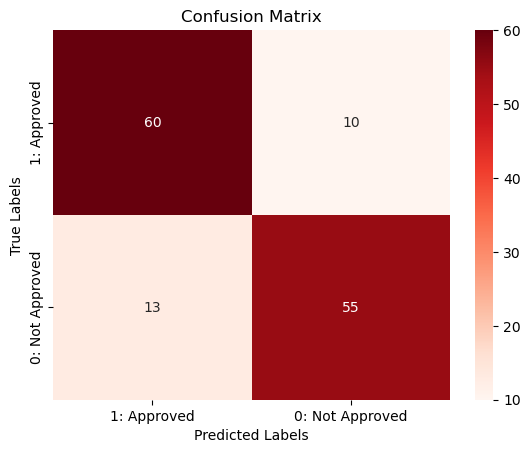

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

labels = ['1: Approved', '0: Not Approved']

y_pred = lm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap = "Reds", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()